In [21]:
import sys
sys.path.append("/home/ckemere/Code/PythonDataAnalysis/Caleb/Tools")
import frank_lab

In [22]:
fileroot = '/home/ckemere/Data/Frank/';

In [23]:
import os
anim_dirs = [(d, os.path.join(fileroot,d)) for d in os.listdir(fileroot) if os.path.isdir(os.path.join(fileroot,d))]
print(anim_dirs)


[('Ten', '/home/ckemere/Data/Frank/Ten'), ('Bon', '/home/ckemere/Data/Frank/Bon'), ('Cor', '/home/ckemere/Data/Frank/Cor'), ('Con', '/home/ckemere/Data/Frank/Con'), ('Dud', '/home/ckemere/Data/Frank/Dud'), ('Fra', '/home/ckemere/Data/Frank/Fra'), ('Eig', '/home/ckemere/Data/Frank/Eig'), ('Fiv', '/home/ckemere/Data/Frank/Fiv'), ('Mil', '/home/ckemere/Data/Frank/Mil')]


In [24]:
for (anim, adir) in anim_dirs:
    print(anim)
    print(adir)

Ten
/home/ckemere/Data/Frank/Ten
Bon
/home/ckemere/Data/Frank/Bon
Cor
/home/ckemere/Data/Frank/Cor
Con
/home/ckemere/Data/Frank/Con
Dud
/home/ckemere/Data/Frank/Dud
Fra
/home/ckemere/Data/Frank/Fra
Eig
/home/ckemere/Data/Frank/Eig
Fiv
/home/ckemere/Data/Frank/Fiv
Mil
/home/ckemere/Data/Frank/Mil


In [25]:
import pandas as pd

#animals = ['Bon', 'Con', 'Fra', 'Dud', 'Fiv', 'Eig', 'Cor', 'Ten', 'Mil']
#animals = [ 'Eig', 'Cor', 'Ten']
animals = ['Bon','Con','Fra']

# don't include Miles - his position is wierd
#animals.remove('Mil')


taskinfo = {}
for (anim, adir) in anim_dirs:
    taskinfo[anim] = frank_lab.load_data(adir, datatype='task')
df = pd.DataFrame([])
for anim in animals:
    taskinfo[anim].insert(0,'Animal',anim)
    df = df.append(taskinfo[anim], ignore_index=True)
taskinfo = df

Loading tentask07.mat
Loading tentask06.mat
Loading tentask03.mat
Loading tentask01.mat
Loading tentask04.mat
Loading tentask02.mat
Loading tentask05.mat
Loading bontask08.mat
Loading bontask09.mat
Loading bontask05.mat
Loading bontask03.mat
Loading bontask10.mat
Loading bontask06.mat
Loading bontask04.mat
Loading bontask07.mat
Loading Cortask06.mat
Loading Cortask05.mat
Loading Cortask09.mat
Loading Cortask08.mat
Loading Cortask07.mat
Loading Cortask01.mat
Loading Cortask03.mat
Loading Cortask02.mat
Loading Cortask04.mat
Loading contask02.mat
Loading contask05.mat
Loading contask03.mat
Loading contask04.mat
Loading contask01.mat
Loading contask06.mat
Loading dudtask06.mat
Loading dudtask03.mat
Loading dudtask02.mat
Loading dudtask04.mat
Loading dudtask05.mat
Loading dudtask01.mat
Loading fratask03.mat
Loading fratask06.mat
Loading fratask02.mat
Loading fratask05.mat
Loading fratask11.mat
Loading fratask10.mat
Loading fratask07.mat
Loading fratask09.mat
Loading fratask04.mat
Loading fr

In [26]:
from ast import literal_eval 

cellinfo = {}
for (anim, adir) in anim_dirs:
    cellinfo[anim], _ = frank_lab.load_data(adir, datatype='cellinfo')

df = pd.DataFrame([])
for anim in animals:
    cellinfo[anim].insert(0,'Animal',anim)
    cellinfo[anim].index = cellinfo[anim].index.map(lambda x: str( (anim,) + literal_eval(x)))
    df = df.append(cellinfo[anim])

cellinfo = df

Loading tencellinfo.mat
Loading boncellinfo.mat
Loading Corcellinfo.mat
Loading concellinfo.mat
Loading dudcellinfo.mat
Loading fracellinfo.mat
Loading Eigcellinfo.mat
Loading Fivcellinfo.mat
Loading milcellinfo.mat


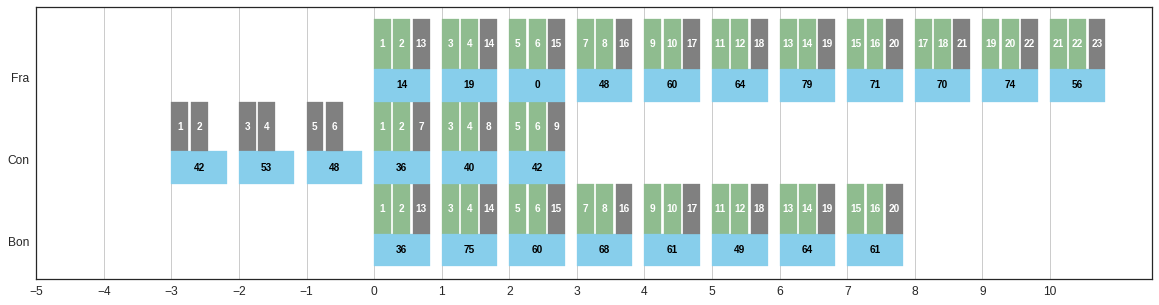

In [27]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.patches as mpatch
%matplotlib inline

import seaborn as sns
sns.set(rc={'figure.figsize': (12, 4),'lines.linewidth': 2, 'font.size': 18, 
            'axes.labelsize': 16, 'legend.fontsize': 12, 'ytick.labelsize': 12, 'xtick.labelsize': 12 })
sns.set_style('white')

w = 0.25 # make patches a little less than 1/3rd to provide spacing
h = 0.6
dh = 0.4

fig, ax = plt.subplots(figsize=(20, 5))

rowidx = 0
rownames = []
for an in animals:
    rownames.append(an)
    tt = taskinfo.query('Animal==@an & type=="run"')
    day_first_B = tt.query('description=="TrackB" & exposure == 1.0')['Day']

    for index, row in tt.iterrows() :
        # find first TrackA exposure for each day
        day = row['Day'] - day_first_B
        ep = row['Epoch'] // 2 # runs are always 1, 3, 5 - integer division gives us 0, 1, 2
        x = day + ep / 3.5 # offset within day is by epoch
        
        if (row['description'] == 'TrackA'):
            tag = '{:d}'.format(int(row['exposure']))
            r = mpatch.Rectangle((x,rowidx + dh), w, h, color='grey')

        else :
            tag = '{:d}'.format(int(row['exposure']))
            r = mpatch.Rectangle((x,rowidx + dh), w, h, color='darkseagreen')

        ax.add_patch(r)
        cx = x + w/2.0
        cy = rowidx + dh + h/2.0

        ax.annotate(tag, (cx, cy), color='w', weight='bold', 
                    fontsize=10, ha='center', va='center')


        if (ep == 0):
            dd = row['Day']
            ncells = len(cellinfo.query('Animal==@an & Day==@dd & Epoch==0'))
            rcells = mpatch.Rectangle((day,rowidx), 2/3.5 + w, dh, color='skyblue')
            ax.add_patch(rcells)
            cy = rowidx + dh/2.0

            ax.annotate('{:d}'.format(ncells), (x + (2/3.5 + w)/2, cy), color='k', weight='bold', 
                        fontsize=10, ha='center', va='center')
        
    rowidx = rowidx + 1

ax.autoscale_view(True,True,True)
ax.set_yticks(np.arange(rowidx)+h/2)
ax.set_xticks(np.arange(-5,11))
ax.set_yticklabels(rownames)
ax.xaxis.grid(True)
ax.get_xgridlines()[0].set_linestyle('-.')
plt.show()

In [28]:
import nelpy as nel
import nelpy.io
import nelpy.plotting as npl

import warnings

In [29]:
data = dict()

for anim in animals:
    data[anim] = dict()
    adir = next(d[1] for d in anim_dirs if d[0] == anim)
    spikes = frank_lab.load_data(adir, datatype='spikes')
    matpos = frank_lab.load_data(adir, datatype='pos')
    posdf = (matpos.dropna(axis=0, subset=['time','x'])
                   .groupby(['Day'], as_index=False)
                   .agg({'time' : lambda x: tuple(x),
                         'x' : lambda x: tuple(x),
                         'y' : lambda x: tuple(x),
                         'vel' : lambda x: tuple(x),
                         'dir' : lambda x: tuple(x)
                        }))
    for var in ['time','x','y','vel','dir']:
        posdf[var] = posdf[var].apply(np.hstack)
    
    for day in spikes['Day'].unique():
        data[anim][day] = dict()
        # Position data
        pp = posdf.query('Day==@day')
        pos = nel.AnalogSignalArray(np.vstack((pp.iloc[0].x, pp.iloc[0].y)), 
                                    timestamps=pp.iloc[0].time, fs=30)
        pos._support = pos.support.merge(gap=3/30)
        data[anim][day]['pos'] = pos

        support = pos.support
        
        task_metadata = taskinfo.query('Animal==@anim & Day==@day')
        task_metadata = task_metadata.merge(matpos.query('Day==@day')[['Epoch','cmperpixel']],how='outer',on=['Epoch'])
        task_metadata.drop(['Animal','Day'],axis=1)
        data[anim][day]['task_metadata'] = task_metadata
        
        if support.n_epochs != task_metadata.shape[0] :
            warnings.warn('Number of epochs in support does not match task_metadata rows')
            print('Animal: {}, Day: {}'.format(anim,day))
            
        spikedf = (spikes.query('Day==@day',inplace=False)
                      .dropna(axis=0, subset=['spiketimes'])
                      .groupby(['Tetrode','Cell'], as_index=False)
                      .agg({'spiketimes': lambda x: tuple(x),
                            'spikewidth' : lambda x: np.unique(list(x.dropna())) if list(x.dropna()) else None}))
                                          
        unit_ids = spikedf.index.tolist()
        numspikes = []
        timestamps = []
        for idx, neuron in spikedf.iterrows() :
            timestamps.append(np.hstack(neuron.spiketimes))
            numspikes.append(len(np.hstack(neuron.spiketimes)))
            
        spikedf['numspikes'] = numspikes

        cell_metadata = (cellinfo.query('Animal==@anim & Day==@day',inplace=False)
            .groupby(['Tetrode','Cell'], as_index=False)
            .agg({'area' : lambda x: np.unique(list(x.dropna())) if list(x.dropna()) else None}))
                  #'layer' : lambda x: x.unique(),
                  #'fs' : lambda x: None if x.last_valid_index() is None else x.loc[x.last_valid_index()]
        print('Day', day)
        cell_metadata = spikedf[['Tetrode','Cell','spikewidth','numspikes']].merge(cell_metadata, on=['Tetrode','Cell'])
                
        data[anim][day]['cell_metadata'] = cell_metadata

        st = nel.SpikeTrainArray(timestamps, unit_ids=unit_ids,support=support, fs=10000)
        data[anim][day]['spikes'] = st
        

Loading bonspikes08.mat
Loading bonspikes09.mat
Loading bonspikes05.mat
Loading bonspikes03.mat
Loading bonspikes10.mat
Loading bonspikes06.mat
Loading bonspikes04.mat
Loading bonspikes07.mat
Loading bonpos08.mat
Loading bonpos09.mat
Loading bonpos05.mat
Loading bonpos03.mat
Loading bonpos10.mat
Loading bonpos06.mat
Loading bonpos04.mat
Loading bonpos07.mat


/home/ckemere/Code/nelpy/nelpy/core/_analogsignalarray.py:267: UserWarning: creating support from time and sampling rate, fs!


Day 2
Day 3
Day 4
Day 5
Day 6
Day 7
Day 8
Day 9
Loading conspikes02.mat
Loading conspikes05.mat
Loading conspikes03.mat
Loading conspikes04.mat
Loading conspikes01.mat
Loading conspikes06.mat
Loading conpos02.mat
Loading conpos05.mat
Loading conpos03.mat
Loading conpos04.mat
Loading conpos01.mat
Loading conpos06.mat
Day 0
Day 1
Day 2


/home/ckemere/Code/nelpy/nelpy/core/_analogsignalarray.py:239: UserWarning: Data is _not_ sorted! Data will be sorted automatically.
/home/ckemere/Code/nelpy/nelpy/core/_spiketrain.py:887: UserWarning: ignoring spikes outside of spiketrain support


Day 3
Day 4
Day 5
Loading fraspikes03.mat
Loading fraspikes06.mat
Loading fraspikes02.mat
Loading fraspikes05.mat
Loading fraspikes11.mat
Loading fraspikes10.mat
Loading fraspikes07.mat
Loading fraspikes09.mat
Loading fraspikes04.mat
Loading fraspikes08.mat
Loading fraspikes12.mat
Loading frapos03.mat
Loading frapos06.mat
Loading frapos02.mat
Loading frapos05.mat
Loading frapos11.mat
Loading frapos10.mat
Loading frapos07.mat
Loading frapos09.mat
Loading frapos04.mat
Loading frapos08.mat
Loading frapos12.mat
Day 1
Day 2


/home/ckemere/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:36: UserWarning: Number of epochs in support does not match task_metadata rows


Animal: Fra, Day: 3
Day 3
Day 4
Day 5
Day 6
Day 7
Day 8
Day 9
Day 10
Day 11


In [31]:
tetinfo = {}
for (anim, adir) in anim_dirs:
    tetinfo[anim],_ = frank_lab.load_data(adir, datatype='tetinfo')
df = pd.DataFrame([])
for anim in animals:
    tetinfo[anim].insert(0,'Animal',anim)
    df = df.append(tetinfo[anim], ignore_index=True)
tetinfo = df

Loading tentetinfo.mat
Loading bontetinfo.mat
Loading Cortetinfo.mat
Loading contetinfo.mat
Loading dudtetinfo.mat
Loading fratetinfo.mat
Loading Eigtetinfo.mat
Loading Fivtetinfo.mat
Loading miltetinfo.mat


In [36]:
import nelpy.io
#np.savez_compressed('FrankLabPickle.npz', data=data, cellinfo=cellinfo, taskinfo=taskinfo)
FrankLabData = nel.ResultsContainer(data=data,
                                    cellinfo=cellinfo,
                                    taskinfo=taskinfo,
                                    tetinfo=tetinfo,
                                    description='Data from the lab of Loren Frank CRCNS archive.\n')

In [38]:
FrankLabData.save_pkl('FrankLabData.nel')

In [12]:
#jar = nel.load_pkl('FrankLabData.nel')
